# <span style="color:#336699">Python Sample Client [<img src="../img/bdc-logo.png" alt="Brazil Data Cube - Python Sample Client" style="height:100px;" align="right">](https://github.com/brazil-data-cube/sample.py)</span>



<hr style="border:2px solid #0077b9;">

# <span style="color:#336699"> Example of using sample.py</span> 

###  Import the required libraries 
<hr style="border:1px solid #0077b9;">

In [1]:
from sample import sample
from matplotlib import pyplot as plt

###  Create sample object
<hr style="border:1px solid #0077b9;">

#### Defines the user and password to connect WFS SAMPLE

In [28]:
auth = ("user", "password")

#### Create sample object by passing the WFS URL and the user if exists

In [3]:
s = sample(wfs="http://127.0.0.1:8091/bdc/geoserver", auth=auth)

###  Sample operations - Dataset
<hr style="border:1px solid #0077b9;">

#### List All avaliable datasets in SAMPLE WFS

In [4]:
s.datasets()

['BDC Sample Dataset - Goias Test Area',
 'Amostras Campo Verde MT (Campo Verde Database)',
 'Insitu Mato Grosso State (Brazil) Land Use and Land Cover Samples 1.8K',
 'Insitu Mato Grosso State (Brazil) Land Use and Land Cover Samples 2K',
 'BDC Sample Dataset - Mato Grosso Test Area',
 'BDC Sample Dataset - Test Area',
 'BDC Sample Dataset - Bahia Test Area',
 'BDC Sample Dataset - Bahia Test Area 2',
 'BDC Sample Dataset 2 - Test Area']

#### Describe dataset given a dataset name

In [5]:
s.describe_dataset('BDC Sample Dataset - Test Area')

{'created_at': '2020-04-17T13:37:53.016Z',
 'updated_at': '2020-04-17T13:37:53.016Z',
 'id': 6,
 'name': 'BDC Sample Dataset - Test Area',
 'start_date': '2018-09-01Z',
 'end_date': '2019-08-31Z',
 'observation_table_name': 'area_bdc_all_observations',
 'midias_table_name': None,
 'version': '1',
 'description': 'Brazil Data Cube samples of study areas',
 'classification_system_name': 'BDC',
 'user_name': 'Fabiana Zioti',
 'collect_method': 'VISUAL'}

#### Returns the dataset metadata given a dataset name

In [6]:
s.describe_dataset('BDC Sample Dataset - Test Area').metadata

{'id': 'test_sites_bdc',
 'dates': [{'date': '2019', 'dateType': 'Issued'}],
 'rightsList': [{'rightsUri': 'https://creativecommons.org/licenses/by/4.0/',
   'rights': 'Creative Commons Attribution 4.0 International'}],
 'version': '1.0',
 'contributors': [{'@type': 'Person',
   'givenName': 'Michelle',
   'familyName': 'Picoli'},
  {'@type': 'Person', 'givenName': 'Rolf', 'familyName': 'Simoes'},
  {'@type': 'Person', 'givenName': 'Michel', 'familyName': 'Chaves'}],
 'types': {'resourceTypeGeneral': 'Dataset',
  'resourceType': 'Dataset',
  'schemaOrg': 'Dataset',
  'citeproc': 'dataset',
  'ris': 'DATA',
  'bibtex': 'misc'},
 'agency': 'INPE',
 'sizes': [],
 'state': 'findable',
 'descriptions': [{'description': 'This dataset include samples for the three test sites used by the Brazilian Data Cube project.',
   'descriptionType': 'Abstract',
   'lang': 'en'}],
 'titles': [{'title': 'Brazil Data Cube samples of study areas',
   'lang': 'en'}],
 'creators': [{'@type': 'Person',
   'giv

###  Sample operations - Observations
<hr style="border:1px solid #0077b9;">

#### Returns a observation geodataframe given a observation table name. (observation_table_name is returned in describe dataset operation)

In [7]:
bdc_obs = s.get_observation('area_bdc_all_observations')

In [8]:
bdc_obs.head()

,location,id,start_date,end_date,collection_date,user_name,class_name
0,POINT (-53.98930 -16.90490),1,2018-09-01Z,2019-08-31Z,None,Fabiana Zioti,Agriculture
1,POINT (-53.71140 -16.70280),2,2018-09-01Z,2019-08-31Z,None,Fabiana Zioti,Agriculture
2,POINT (-53.45550 -16.22080),3,2018-09-01Z,2019-08-31Z,None,Fabiana Zioti,Agriculture
3,POINT (-54.59790 -17.31970),4,2018-09-01Z,2019-08-31Z,None,Fabiana Zioti,Agriculture
4,POINT (-54.49360 -17.28870),5,2018-09-01Z,2019-08-31Z,None,Fabiana Zioti,Agriculture


#### Plot BDC Sample Dataset - Test Area Observations

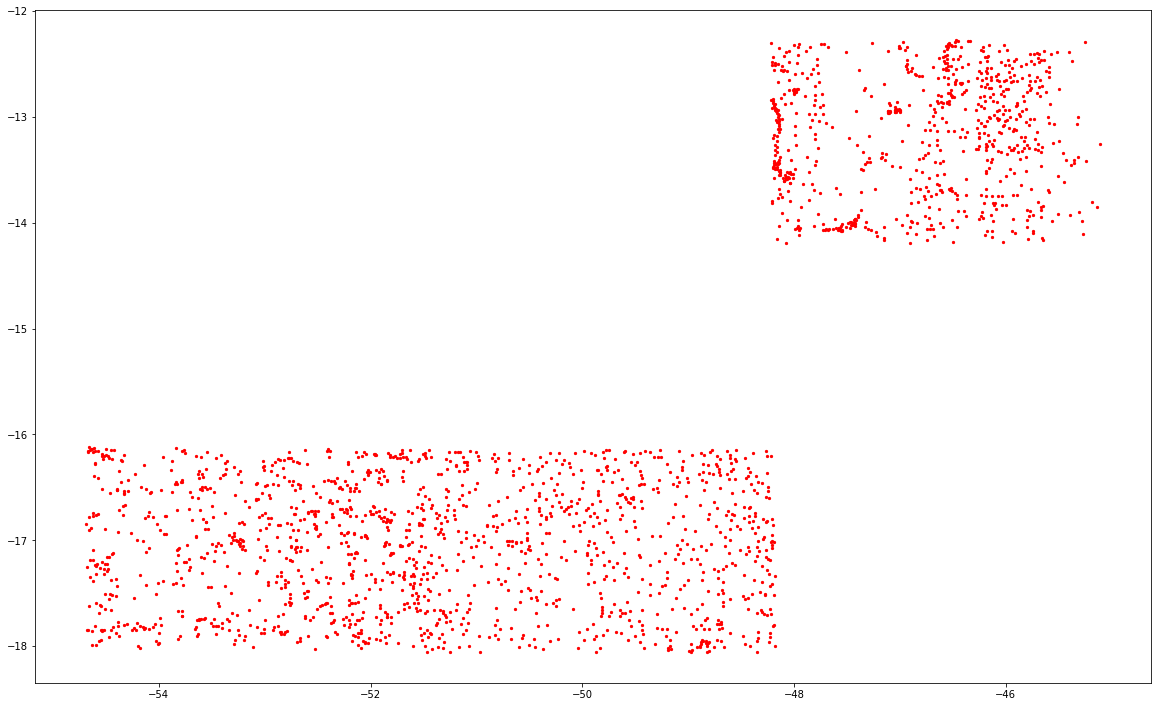

In [9]:
bdc_obs.plot( marker='o', color='red', markersize=5, figsize=(20, 20));

#### Unique Classes of BDC Sample Dataset - Test Area

In [10]:
bdc_obs.class_name.unique()

array(['Agriculture', 'Natural', 'Pasture', 'Bare Soil', 'Water Bodies'],
      dtype=object)

#### CRS information

In [11]:
bdc_obs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

###  Sample - IBGE data
<hr style="border:1px solid #0077b9;">

#### Returns a geodataframe with the federative units of Brazil 

In [12]:
uf = s.get_ibge('uf_2018')

In [13]:
uf.head()

,geom,id,nome,sigla,geocodigo,regiao,regiao_sigla
0,"MULTIPOLYGON (((-37.98250 -11.34820, -37.98250...",1,SERGIPE,SE,28,NORDESTE,NE
1,"MULTIPOLYGON (((-44.48150 -2.72660, -44.47870 ...",2,MARANHÃO,MA,21,NORDESTE,NE
2,"MULTIPOLYGON (((-29.33710 -20.48800, -29.33690...",3,ESPÍRITO SANTO,ES,32,SUDESTE,SE
3,"MULTIPOLYGON (((-69.61340 -2.44020, -69.53450 ...",4,AMAZONAS,AM,13,NORTE,N
4,"MULTIPOLYGON (((-63.97810 2.46750, -63.97870 2...",5,RORAIMA,RR,14,NORTE,N


#### Returns a geodataframe with biomes from Brazil

In [14]:
biomas = s.get_ibge('biomas')

In [15]:
biomas.head()

,geom,id,nome
0,"MULTIPOLYGON (((-44.08510 -2.41670, -44.08560 ...",1,Amazônia
1,"MULTIPOLYGON (((-41.74080 -2.80830, -41.73670 ...",2,Caatinga
2,"MULTIPOLYGON (((-43.39010 -2.33940, -43.38740 ...",3,Cerrado
3,"MULTIPOLYGON (((-48.70810 -28.44850, -48.70990...",4,Mata Atlântica
4,"MULTIPOLYGON (((-52.82470 -27.46300, -52.81560...",5,Pampa


#### CRS Information

In [16]:
biomas.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - SIRGAS 2000 by country
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [17]:
uf.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - SIRGAS 2000 by country
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

###  Visualização de dados geográficos com GeoPandas
<hr style="border:1px solid #0077b9;">

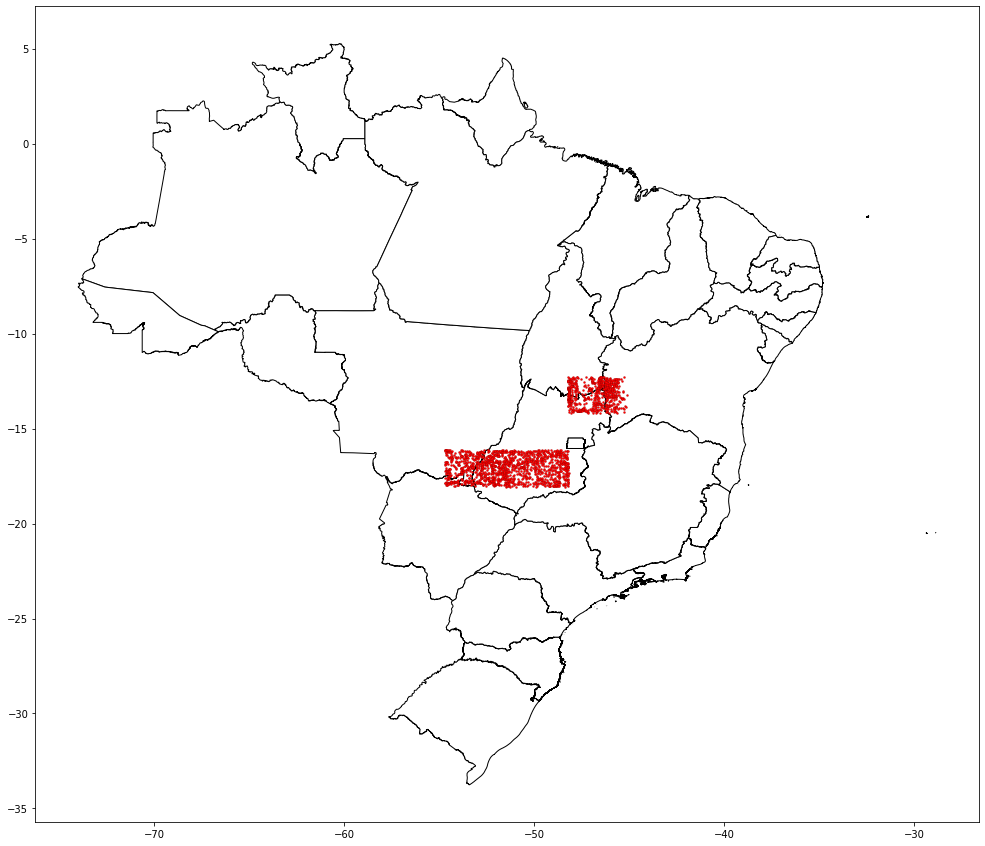

In [18]:
base = uf.plot(color='white', edgecolor='black', figsize=(20, 15))
bdc_obs.plot(ax=base, marker='o', color='red', markersize=5, edgecolor='black', linewidth = 0.1);


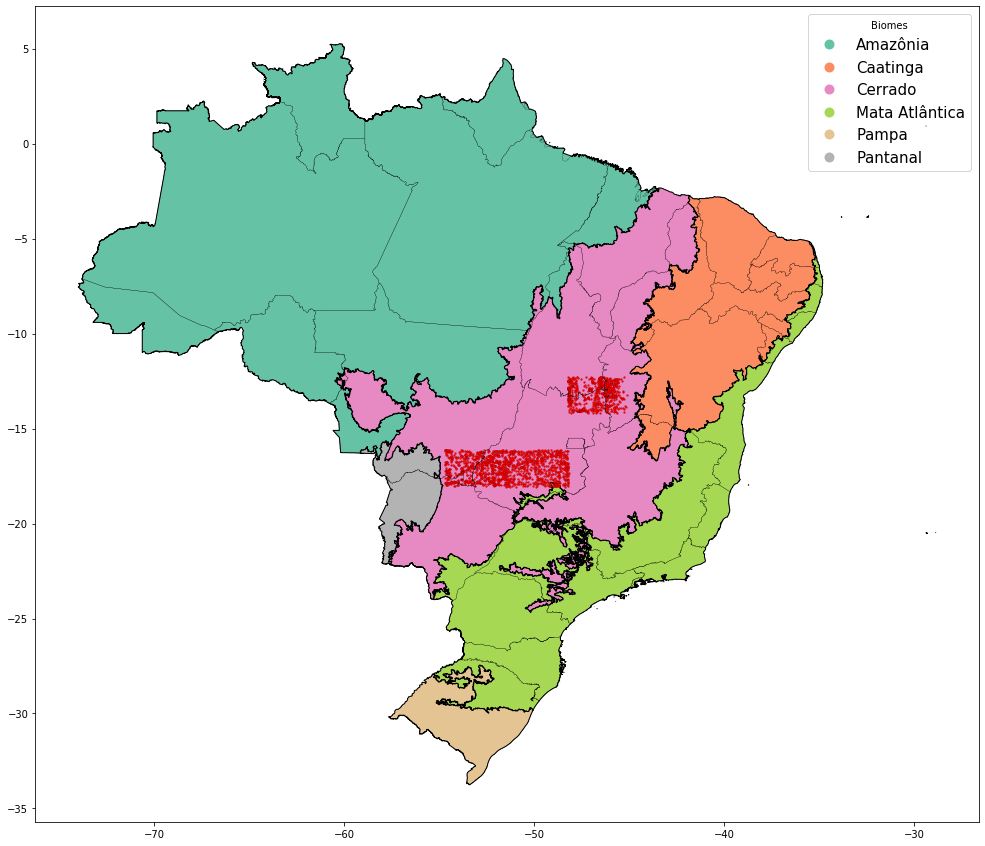

In [26]:
fig, ax = plt.subplots(figsize=(20,15))

# ax.set_aspect('equal')

biomas.plot(ax=ax, cmap='Set2', column='nome',edgecolor='black', legend=True,legend_kwds={'title': "Biomes", 'fontsize': 15})

uf.geometry.boundary.plot(ax=ax, color=None, edgecolor='black',linewidth = 0.2)

bdc_obs.plot(ax=ax, marker='o', color='red', markersize=4, edgecolor='black', linewidth = 0.1);

###  Sample - Save observation data
<hr style="border:1px solid #0077b9;">

In [27]:
bdc_obs.to_file("my_save_bdc_obs.shp",  encoding="utf-8")